<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

# K-Means Clustering

Estimated time needed: **25** minutes

## Objectives

After completing this lab you will be able to:

*   Use scikit-learn's K-Means Clustering to cluster data


## Introduction

There are many models for **clustering** out there. In this notebook, we will be presenting the model that is considered one of the simplest models amongst them. Despite its simplicity, the **K-means** is vastly used for clustering in many data science applications, it is especially useful if you need to quickly discover insights from **unlabeled data**. In this notebook, you will learn how to use k-Means for customer segmentation.

Some real-world applications of k-means:

*   Customer segmentation
*   Understand what the visitors of a website are trying to accomplish
*   Pattern recognition
*   Machine learning
*   Data compression

In this notebook we practice k-means clustering with 2 examples:

*   k-means on a random generated dataset
*   Using k-means for customer segmentation


<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="https://#random_generated_dataset">k-Means on a randomly generated dataset</a></li>
            <ol>
                <li><a href="https://#setting_up_K_means">Setting up K-Means</a></li>
                <li><a href="https://#creating_visual_plot">Creating the Visual Plot</a></li>
            </ol>
        <p></p>
        <li><a href="https://#customer_segmentation_K_means">Customer Segmentation with K-Means</a></li>
            <ol>
                <li><a href="https://#pre_processing">Pre-processing</a></li>
                <li><a href="https://#modeling">Modeling</a></li>
                <li><a href="https://#insights">Insights</a></li>
            </ol>
    </ul>
</div>
<br>
<hr>


### Import libraries

Let's first import the required libraries.
Also run <b> %matplotlib inline </b> since we will be plotting in this section.


In [57]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs 
%matplotlib inline

<h1 id="random_generated_dataset">k-Means on a randomly generated dataset</h1>

Let's create our own dataset for this lab!


First we need to set a random seed. Use <b>numpy's random.seed()</b> function, where the seed will be set to <b>0</b>.


In [58]:
np.random.seed(0)

Next we will be making <i> random clusters </i> of points by using the <b> make_blobs </b> class. The <b> make_blobs </b> class can take in many inputs, but we will be using these specific ones. <br> <br> <b> <u> Input </u> </b>

<ul>
    <li> <b>n_samples</b>: The total number of points equally divided among clusters. </li>
    <ul> <li> Value will be: 5000 </li> </ul>
    <li> <b>centers</b>: The number of centers to generate, or the fixed center locations. </li>
    <ul> <li> Value will be: [[4, 4], [-2, -1], [2, -3],[1,1]] </li> </ul>
    <li> <b>cluster_std</b>: The standard deviation of the clusters. </li>
    <ul> <li> Value will be: 0.9 </li> </ul>
</ul>
<br>
<b> <u> Output </u> </b>
<ul>
    <li> <b>X</b>: Array of shape [n_samples, n_features]. (Feature Matrix)</li>
    <ul> <li> The generated samples. </li> </ul> 
    <li> <b>y</b>: Array of shape [n_samples]. (Response Vector)</li>
    <ul> <li> The integer labels for cluster membership of each sample. </li> </ul>
</ul>


In [111]:
X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

In [60]:
X

array([[-1.82150565,  0.07098024],
       [ 2.16732621, -2.93199608],
       [ 0.8465158 , -3.26075305],
       ...,
       [ 3.29772603,  4.24400152],
       [-1.69503125, -0.29979681],
       [-1.64362141,  0.63035513]])

In [61]:
X[:, 1]

array([ 0.07098024, -2.93199608, -3.26075305, ...,  4.24400152,
       -0.29979681,  0.63035513])

In [62]:
y.shape

(5000,)

In [63]:
X.shape

(5000, 2)

Display the scatter plot of the randomly generated data.


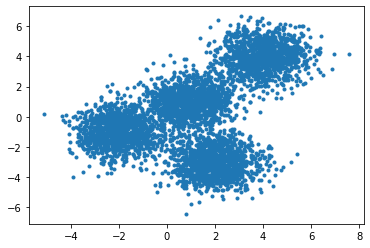

In [112]:
plt.scatter(X[:, 0], X[:, 1], marker='.')

<h2 id="setting_up_K_means">Setting up K-Means</h2>
Now that we have our random data, let's set up our K-Means Clustering.


The KMeans class has many parameters that can be used, but we will be using these three:

<ul>
    <li> <b>init</b>: Initialization method of the centroids. </li>
    <ul>
        <li> Value will be: "k-means++" </li>
        <li> k-means++: Selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.</li>
    </ul>
    <li> <b>n_clusters</b>: The number of clusters to form as well as the number of centroids to generate. </li>
    <ul> <li> Value will be: 4 (since we have 4 centers)</li> </ul>
    <li> <b>n_init</b>: Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia. </li>
    <ul> <li> Value will be: 12 </li> </ul>
</ul>

Initialize KMeans with these parameters, where the output parameter is called <b>k_means</b>.


In [114]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)

Now let's fit the KMeans model with the feature matrix we created above, <b> X </b>.


In [115]:
k_means.fit(X)

KMeans(n_clusters=4, n_init=12)

Now let's grab the labels for each point in the model using KMeans' <b> .labels\_ </b> attribute and save it as <b> k_means_labels </b>.


In [67]:
#Each instance is assigned to one of the 4 clusters. 
#It receives a label as the index of the cluster it gets assigned to. We can see these labels: y_pred.

In [116]:
k_means_labels = k_means.labels_
k_means_labels

array([3, 3, 2, ..., 1, 2, 1])

In [69]:
set(k_means_labels) #distinct objects from that one

{0, 1, 2, 3}

In [70]:
range(len([[4,4], [-2, -1], [2, -3], [1, 1]]))

range(0, 4)

We will also get the coordinates of the cluster centers using KMeans' <b> .cluster_centers\_ </b> and save it as <b> k_means_cluster_centers </b>.


In [117]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-2.0199922 , -1.01607875],
       [ 4.02796066,  4.02192381],
       [ 2.00836266, -3.05597878],
       [ 0.98509731,  1.06673729]])

<h2 id="creating_visual_plot">Creating the Visual Plot</h2>

So now that we have the random data generated and the KMeans model initialized, let's plot them and see what it looks like!


Please read through the code and comments to understand how to plot the model.


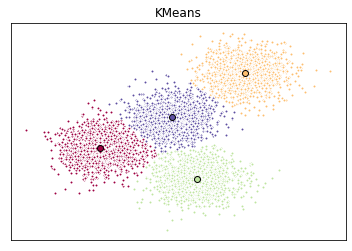

In [118]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # [[4,4], [-2, -1], [2, -3], [1, 1]] = K_means.cluster_centers_
    # Create a list of all data points, where the data points that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()


In [73]:
len(set(k_means_labels))

4

## Practice

Try to cluster the above dataset into 3 clusters.\
Notice: do not generate the data again, use the same dataset as above.


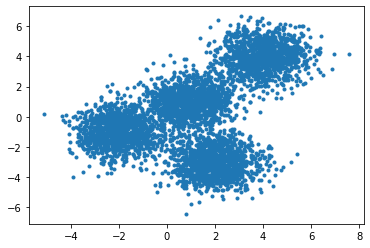

In [119]:
# write your code here
#X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3]], cluster_std=0.9)
plt.scatter(X[:, 0], X[:, 1], marker='.')
k_means3 = KMeans(init = "k-means++", n_clusters = 3, n_init = 12)
k_means3.fit(X)
k_means_labels = k_means3.labels_
k_means_cluster_centers = k_means3.cluster_centers_

In [120]:
k_means_cluster_centers

array([[ 3.66474473,  3.65549653],
       [ 2.01457367, -3.00670718],
       [-0.82786759, -0.18590703]])

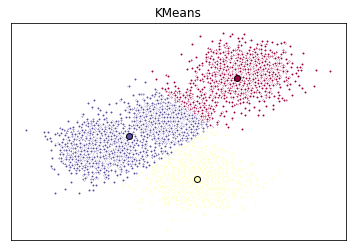

In [137]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len(k_means3.cluster_centers_)), colors):

    # Create a list of all data points, where the data points that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()


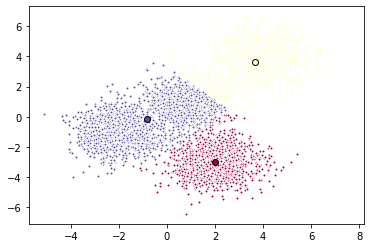

In [138]:
k_means3 = KMeans(init = "k-means++", n_clusters = 3, n_init = 12)
k_means3.fit(X)
fig = plt.figure(figsize=(6, 4))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means3.labels_))))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(len(k_means3.cluster_centers_)), colors):
    my_members = (k_means3.labels_ == k)
    cluster_center = k_means3.cluster_centers_[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)
plt.show()

<details><summary>Click here for the solution</summary>

```python
k_means3 = KMeans(init = "k-means++", n_clusters = 3, n_init = 12)
k_means3.fit(X)
fig = plt.figure(figsize=(6, 4))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means3.labels_))))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(len(k_means3.cluster_centers_)), colors):
    my_members = (k_means3.labels_ == k)
    cluster_center = k_means3.cluster_centers_[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)
plt.show()

```

</details>


<h1 id="customer_segmentation_K_means">Customer Segmentation with K-Means</h1>

Imagine that you have a customer dataset, and you need to apply customer segmentation on this historical data.
Customer segmentation is the practice of partitioning a customer base into groups of individuals that have similar characteristics. It is a significant strategy as a business can target these specific groups of customers and effectively allocate marketing resources. For example, one group might contain customers who are high-profit and low-risk, that is, more likely to purchase products, or subscribe for a service. A business task is to retain those customers. Another group might include customers from non-profit organizations and so on.

Let's download the dataset. To download the data, we will use **`!wget`** to download it from IBM Object Storage.\
**Did you know?** When it comes to Machine Learning, you will likely be working with large datasets. As a business, where can you host your data? IBM is offering a unique opportunity for businesses, with 10 Tb of IBM Cloud Object Storage: [Sign up now for free](http://cocl.us/ML0101EN-IBM-Offer-CC)


In [78]:
#!wget -O Cust_Segmentation.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/Cust_Segmentation.csv

### Load Data From CSV File

Before you can work with the data, you must use the URL to get the Cust_Segmentation.csv.


In [139]:
import pandas as pd
cust_df = pd.read_csv("Cust_Segmentation.csv")
cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


<h2 id="pre_processing">Pre-processing</h2


As you can see, **Address** in this dataset is a categorical variable. The k-means algorithm isn't directly applicable to categorical variables because the Euclidean distance function isn't really meaningful for discrete variables. So, let's drop this feature and run clustering.


In [80]:
df = cust_df.drop('Address', axis=1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


#### Normalizing over the standard deviation

Now let's normalize the dataset. But why do we need normalization in the first place? Normalization is a statistical method that helps mathematical-based algorithms to interpret features with different magnitudes and distributions equally. We use **StandardScaler()** to normalize our dataset.


In [81]:
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:] #Customer id is eliminated
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

In [82]:
a = pd.DataFrame(Clus_dataSet)
a

,0,1,2,3,4,5,6,7
0,0.742915,0.312122,-0.378790,-0.718459,-0.683811,-0.590489,-0.523797,-0.576525
1,1.489490,-0.766349,2.573721,1.384325,1.414474,1.512962,-0.523797,0.391387
2,-0.252518,0.312122,0.211712,0.268032,2.134141,0.801704,1.909138,1.597554
3,-0.750235,0.312122,-0.674041,-0.718459,-0.421643,-0.754467,-0.523797,-0.576525
4,1.489490,-0.766349,3.311849,5.356249,3.638900,1.716094,-0.523797,-0.442507
...,...,...,...,...,...,...,...,...
845,-0.999093,-0.766349,-0.526415,-0.536737,-0.484243,-0.547213,-0.523797,-0.502070
846,-0.874664,0.312122,-0.231164,-0.329054,-0.573202,-0.311403,-0.523797,-0.472288
847,-1.247951,2.469066,-1.264543,-0.744419,0.576666,0.038633,1.909138,3.458923
848,-0.376947,-0.766349,0.506963,-0.484816,-0.687577,-0.701476,-0.523797,-1.082817


Now u see the normalized data in a dataFrame

In [149]:
X = df.values[:,1:]
X

array([[41. ,  2. ,  6. , ...,  0. ,  6.3,  2. ],
       [47. ,  1. , 26. , ...,  0. , 12.8,  1. ],
       [33. ,  2. , 10. , ...,  1. , 20.9,  0. ],
       ...,
       [25. ,  4. ,  0. , ...,  1. , 33.4,  0. ],
       [32. ,  1. , 12. , ...,  0. ,  2.9,  2. ],
       [52. ,  1. , 16. , ...,  0. ,  8.6,  1. ]])

In [150]:
X = np.nan_to_num(X)
X

array([[41. ,  2. ,  6. , ...,  0. ,  6.3,  2. ],
       [47. ,  1. , 26. , ...,  0. , 12.8,  1. ],
       [33. ,  2. , 10. , ...,  1. , 20.9,  0. ],
       ...,
       [25. ,  4. ,  0. , ...,  1. , 33.4,  0. ],
       [32. ,  1. , 12. , ...,  0. ,  2.9,  2. ],
       [52. ,  1. , 16. , ...,  0. ,  8.6,  1. ]])

<h2 id="modeling">Modeling</h2>


In our example (if we didn't have access to the k-means algorithm), it would be the same as guessing that each customer group would have certain age, income, education, etc, with multiple tests and experiments. However, using the K-means clustering we can do all this process much easier.

Let's apply k-means on our dataset, and take a look at cluster labels.


In [85]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_

In [140]:
labels[0:10]

array([0, 2, 0, 0, 1, 2, 0, 2, 0, 2])

In [143]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(Clus_dataSet) #Clus_data set normalized feature
labels = k_means.labels_

In [144]:
labels[0:10]

array([2, 1, 0, 2, 1, 1, 2, 2, 2, 1])

In [145]:
k_means.cluster_centers_

array([[-3.90439547e-01,  1.62695612e-01, -6.79376729e-01,
        -3.86448408e-01, -6.83901553e-05, -6.93056978e-02,
         1.87982575e+00,  5.69270845e-01],
       [ 9.91773769e-01,  2.38756999e-01,  1.27421461e+00,
         1.43518566e+00,  1.24440502e+00,  1.43538377e+00,
        -2.09335587e-01,  5.57517111e-01],
       [-1.50796609e-01, -1.15651304e-01, -1.38795179e-01,
        -2.73411279e-01, -3.40626044e-01, -3.71502176e-01,
        -5.23796543e-01, -3.28592133e-01]])

3 group of centroids each cluster let say 8 points in that

<h2 id="insights">Insights</h2>

We assign the labels to each row in the dataframe.


In [146]:
df["Clus_km"] = labels
df.head(5)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,2
1,2,47,1,26,100,4.582,8.218,0.0,12.8,1
2,3,33,2,10,57,6.111,5.802,1.0,20.9,0
3,4,29,2,4,19,0.681,0.516,0.0,6.3,2
4,5,47,1,31,253,9.308,8.908,0.0,7.2,1


We can easily check the centroid values by averaging the features in each cluster.


How do you find the centroid value?
For each cluster, add the values of all members. For example, if a cluster of data consisted of the points (80, 56), (75, 53), (60, 50), and (68,54), the sum of the values would be (283, 213).
Divide the total by the number of members of the cluster. In the example like 4 clusters, 283 divided by four is 70.75, and 213 divided by four is 53.25, so the centroid of the cluster is (70.75, 53.25).

In [89]:
df.groupby('Clus_km').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,
0,432.468413,32.964561,1.614792,6.374422,31.164869,1.032541,2.104133,0.285185,10.094761
1,410.166667,45.388889,2.666667,19.555556,227.166667,5.678444,10.907167,0.285714,7.322222
2,402.295082,41.333333,1.956284,15.256831,83.928962,3.103639,5.765279,0.171233,10.724590


Now, let's look at the distribution of customers based on their age and income:


C:\Users\hp\AppData\Local\Temp\ipykernel_26148\4248688761.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)


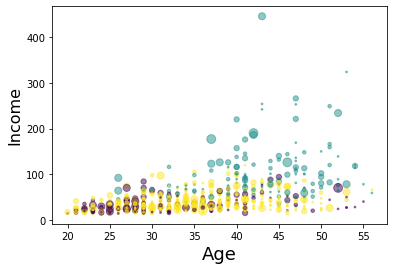

In [151]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()


In [91]:
area = np.pi * ( X[:, 1])**2  
area.shape

(850,)

In [92]:
X.shape

(850, 8)

C:\Users\hp\AppData\Local\Temp\ipykernel_26148\546968922.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
C:\Users\hp\AppData\Local\Temp\ipykernel_26148\546968922.py:14: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float))


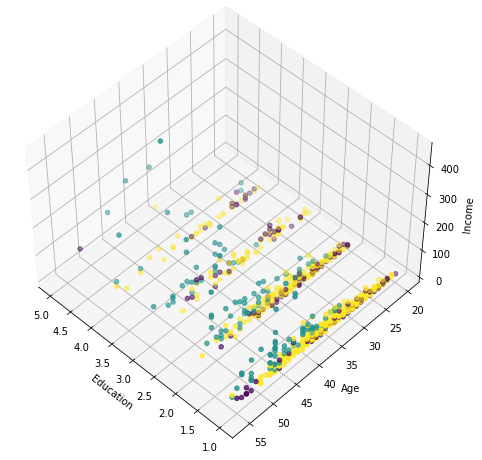

In [152]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float))


k-means will partition your customers into mutually exclusive groups, for example, into 3 clusters. The customers in each cluster are similar to each other demographically.
Now we can create a profile for each group, considering the common characteristics of each cluster.
For example, the 3 clusters can be:

*   AFFLUENT, EDUCATED AND OLD AGED
*   MIDDLE AGED AND MIDDLE INCOME
*   YOUNG AND LOW INCOME


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="https://www.ibm.com/analytics/spss-statistics-software?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://www.ibm.com/cloud/watson-studio?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Watson Studio</a>


### Thank you for completing this lab!

## Author

Saeed Aghabozorgi

### Other Contributors

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">Joseph Santarcangelo</a>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By | Change Description                 |
| ----------------- | ------- | ---------- | ---------------------------------- |
| 2020-11-03        | 2.1     | Lakshmi    | Updated URL of csv                 |
| 2020-08-27        | 2.0     | Lavanya    | Moved lab to course repo in GitLab |
|                   |         |            |                                    |
|                   |         |            |                                    |

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>


# A simple understanding for better understanding

In [155]:
x = np.random.rand(5000)
x = x.reshape(-1,1)
x[0:5]

array([[0.5118132 ],
       [0.97710017],
       [0.7695893 ],
       [0.66965228],
       [0.29020359]])

In [154]:
y = np.random.rand(5000)
y[0:5]

array([0.79966411, 0.8863175 , 0.31407918, 0.42536912, 0.50698092])

In [156]:
x.shape

(5000, 1)

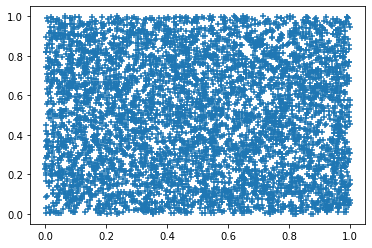

In [187]:
plt.scatter(x,y, marker = '+')

Now data is plotted on scatter plot
its time to let say get hands on KNN
Well i use library here -> Give numbers of clusters and algorithm calculate the distance between the points and do so

In [188]:
k_means = KMeans(init = "k-means++", n_clusters = 5, n_init = 20)

In [189]:
k_means.fit(x) #n_init = 12 shows that how many time your algorithm search for centroids

KMeans(n_clusters=5, n_init=20)

In [190]:
k_means_labels = k_means.labels_
k_means_labels[0:5]

array([1, 2, 4, 4, 3])

In [191]:
set(k_means_labels)

{0, 1, 2, 3, 4}

In [192]:
k_means_clusters = k_means.cluster_centers_
k_means_clusters

array([[0.09826704],
       [0.49014308],
       [0.90170178],
       [0.29021801],
       [0.69672204]])

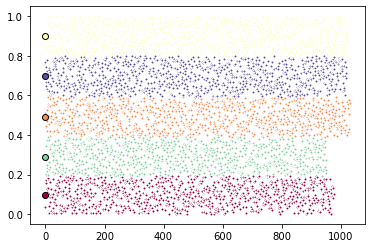

In [199]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len(k_means.cluster_centers_)), colors):

    # Create a list of all data points, where the data points that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_clusters[k]
    
    # Plots the datapoints with color col.
    ax.plot(x[my_members, 0], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Show the plot
plt.show()

Now the summary is the data is plotted on scatter plot and then we specify the number of clusters.
How centroid is picked this is algorithm headache here and how it calc distance

But for knowledge you say:
Picking Random centroids if 4 clusters then 4 centroids.
Calculate the value of each point in data set from centroid.
Point is assigned to the centroid with least distance
Then calculate the error.
n_init you say 12 times centroid will update
But if u implement in depth of maths then centroid will be updated until it will stop moving.
How it is updated by calc. the mean of all points in the cluster.

In [174]:
def cluster_maker(k_means2, data, ax, k_means_clusters2, k_means_labels2):
    fig = plt.figure(figsize=(6, 4))
    colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels2))))
    ax = fig.add_subplot(1, 1, 1)
    for k, col in zip(range(len(k_means2.cluster_centers_)), colors):
        a = (k_means2.labels_ == k)
        cluster_center = k_means_clusters2[k]
        ax.plot(data[a, 0], 'w', markerfacecolor=col, marker='.')
        ax.plot(cluster_center[0], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)  
    ax.set_title('KMeans')
    ax.set_xticks(())
    ax.set_yticks(())
    plt.show()
    

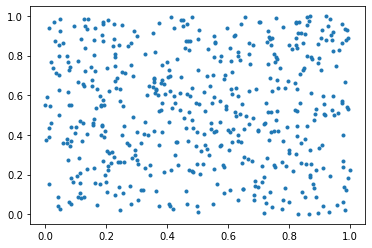

In [175]:
xx = np.random.rand(500)
xx = xx.reshape(-1,1)
yy = np.random.rand(500)
plt.scatter(xx,yy, marker = '.')

In [176]:
k_means2 = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)
k_means2.fit(xx)
k_means_labels2 = k_means.labels_
k_means_clusters2 = k_means.cluster_centers_

In [178]:
k_means_clusters2

array([[0.28834928],
       [0.90020397],
       [0.69377425],
       [0.48730522],
       [0.09797316]])

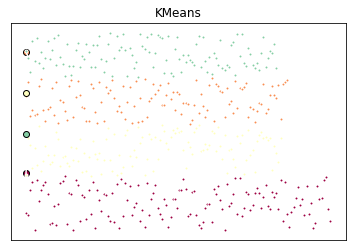

In [177]:
cluster_maker(k_means2, xx, ax, k_means_clusters2, k_means_labels2)

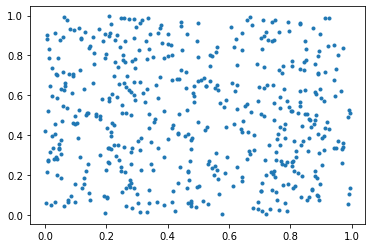

In [181]:
xxy = np.random.rand(500)
xxy = xxy.reshape(-1,1)
yyy = np.random.rand(500)
plt.scatter(xxy,yyy, marker = '.')
k_means2 = KMeans(init = "k-means++", n_clusters = 5, n_init = 12)
k_means2.fit(xxy)
k_means_labels2 = k_means2.labels_
k_means_clusters2 = k_means2.cluster_centers_


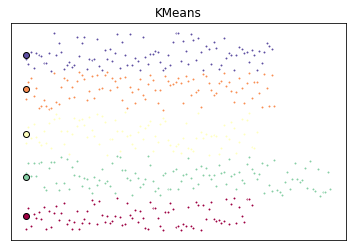

In [182]:
fig = plt.figure(figsize=(6, 4))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels2))))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(len(k_means2.cluster_centers_)), colors):
    a = (k_means_labels2 == k)
    cluster_center = k_means_clusters2[k]
    ax.plot(xxy[a, 0], 'w', markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)  
ax.set_title('KMeans')
ax.set_xticks(())
ax.set_yticks(())
plt.show()

